## 1 The file titanic.xlsx contains data of passengers of the Titanic disaster. The description of the variables is also contained in the Excel file.

### (a) Read this data set into a Pandas DataFrame.

In [1]:
from pydataset import data

In [2]:
Titanic=data('titanic')

In [3]:
Titanic.head()

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes


### (b) Explore the data graphically to identify the variables that influence the chance of survival of the passenger.

In [4]:
import seaborn as sns

#### This question depends upon the excel file given in question to identify the impact of variable as the above imported dataset does not contain varibale to study.

### (c) Prepare and output the contingency table for variables describing Passenger class and the survival status.

In [5]:
import pandas as pd

In [6]:
pd.crosstab(index=Titanic['class'],columns=Titanic['survived'])

survived,no,yes
class,,
1st class,122,203
2nd class,167,118
3rd class,528,178


#### Above is the contigency table for class and survival status of pessengers.
#### If margins are to be computed then it will be as below.

In [7]:
ConTab=pd.crosstab(index=Titanic['class'],columns=Titanic['survived'],margins=True)
ConTab

survived,no,yes,All
class,,,
1st class,122,203,325
2nd class,167,118,285
3rd class,528,178,706
All,817,499,1316


### (d) Compute and output

#### (i) Table of expected frequencies
#### (ii) Chi-square statistic, and
#### (ii) P-Value
#### for testing the independence of the two variables based on contingency table computed above.
#### (You are not supposed to use any package that readily performs above test)

#### (i) Table of expected frequencies
#### expected frequencies will be computed as below

In [8]:
Exp_ConTab=ConTab.loc[:,['All']].values*ConTab.loc[['All']].values/ConTab.loc['All','All']
Exp_ConTab=pd.DataFrame(Exp_ConTab,index=ConTab.index,columns=ConTab.columns)
Exp_ConTab

survived,no,yes,All
class,,,
1st class,201.766717,123.233283,325.0
2nd class,176.933891,108.066109,285.0
3rd class,438.299392,267.700608,706.0
All,817.000000,499.000000,1316.0


Above computed is the expected freq table for class and survival of pessengers.

#### (ii) Chi-square statistic, and

In [9]:
Chi2Value=(ConTab.iloc[0:3,0:2]**2/Exp_ConTab.iloc[0:3,0:2]).sum().sum()-ConTab.loc['All','All']
Chi2Value

133.05203598610024

Hence the chisq value obtained is 133.05.

#### (ii) P-Value

to compute p-value we need to import stats from scipy first and then compute the p-value of chisq.

In [10]:
from scipy import stats
pvalue=stats.chi2.sf(Chi2Value,df=1)
print("P-value= {:.4f}".format(pvalue))

P-value= 0.0000


Here P-value is less than alpha(0.05).Hence We reject H0 and conclude that class and survival stats of the pessengers are dependent on each other.

## Q-2 The dataset iris contains data on the variables: Sepal Length, Sepal Width, Petal Length, Petal Width, and Species. 

#### (a) Read this dataset from CSV file Iris.csv into a Pandas DataFrame. 

In [14]:
iris = pd.read_csv("iris.csv")
df=pd.DataFrame(iris)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


#### (b) Prepare a scatter diagram of Petal Length vs Petal width, distinguishing the points corresponding to different species.


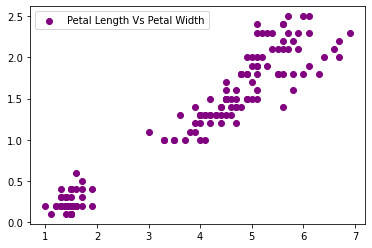

In [19]:
import matplotlib.pyplot as plt
plt.scatter(iris['petal_length'],iris['petal_width'],color='purple',label="Petal Length Vs Petal Width")
plt.legend() 

#### c) Obtain a DataFrame containing (i) Mean and (ii) Standard Deviation of Sepal length and Sepal width For each species.

In [35]:
byspecies=iris.groupby('species')
byspecies.agg(['std','mean'])

sepal_length        sepal_width        petal_length         \
                    std   mean         std   mean          std   mean   
species                                                                 
setosa         0.352490  5.006    0.381024  3.418     0.173511  1.464   
versicolor     0.516171  5.936    0.313798  2.770     0.469911  4.260   
virginica      0.635880  6.588    0.322497  2.974     0.551895  5.552   

           petal_width         
                   std   mean  
species                        
setosa        0.107210  0.244  
versicolor    0.197753  1.326  
virginica     0.274650  2.026

In [37]:
x = iris["sepal_length"]
y = iris["sepal_width"]
w=x.agg(['std','mean'])
w


SyntaxError: invalid syntax (<ipython-input-37-2ece87353f57>, line 1)

In [29]:
k=y.agg(['std','mean'])
k

std     0.433594
mean    3.054000
Name: sepal_width, dtype: float64

#### D) Use formula api of StatsModels to fit a linear regression model, without intercept, for Petal length on Sepal length and Sepal width.

In [15]:
import statsmodels.api as sm